In [58]:
import pandas as pd
import numpy as np

In [59]:
customer_df = pd.read_csv("/Users/giacomorossini/Desktop/IRONHACK/Laboratory/LAB11.1/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [60]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [61]:
customer_df.shape

(9134, 24)

In [62]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [63]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


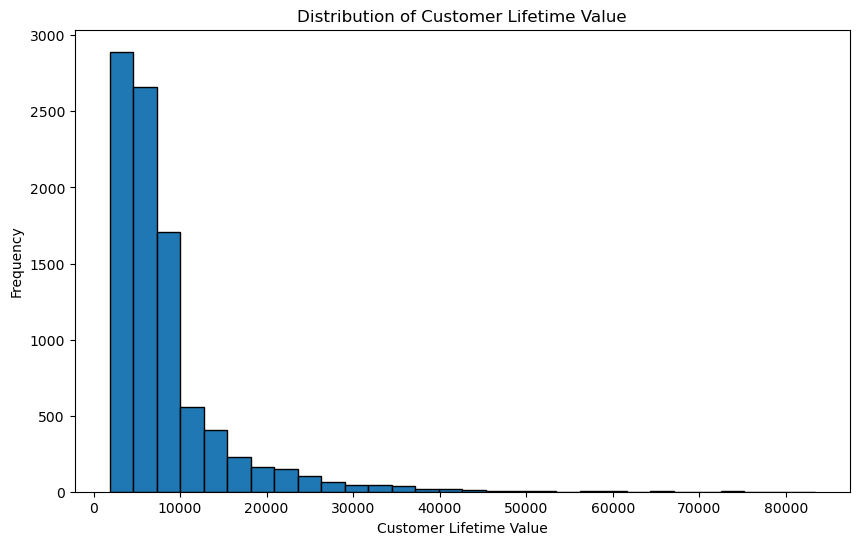

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(customer_df['Customer Lifetime Value'], bins=30, edgecolor='black')
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

In [65]:
def transformation (df):
    cols=[]
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns=cols
    
transformation(customer_df)
customer_df.head(0)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


In [66]:
#5. Change effective to date column to datetime format.

customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

In [67]:
#6. Create a new dataframe using only the numerical data called numerical_df.  Use this for the following questions.
numerical_df = customer_df.select_dtypes(include = np.number)
numerical_df.head(1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147


In [68]:
#6. Define a function that differentiates between continuous and discrete variables. 
#Hint: The number of unique values might be useful. 
#Store continuous data into a continuous_df variable and do the same for discrete_df

for column in numerical_df.columns:
    unique = len(set(numerical_df[column])) #set return a list w/ no duplicate values + len of the list
    print(column,':',unique)

customer_lifetime_value : 8041
income : 5694
monthly_premium_auto : 202
months_since_last_claim : 36
months_since_policy_inception : 100
number_of_open_complaints : 6
number_of_policies : 9
total_claim_amount : 5106


In [69]:
def differentiate_features(df):
    continuous_vars = []
    discrete_vars = []
    for column in df:
        threshold = 24 #arbitrary selected
        if df[column].nunique() > threshold: #counting unique by condition
            continuous_vars.append(column)
        else:
            discrete_vars.append(column)
    return df[continuous_vars], df[discrete_vars]

# Store continuous data into a continuous_df variable and do the same for discrete_df
continuous_df, discrete_df = differentiate_features(numerical_df)

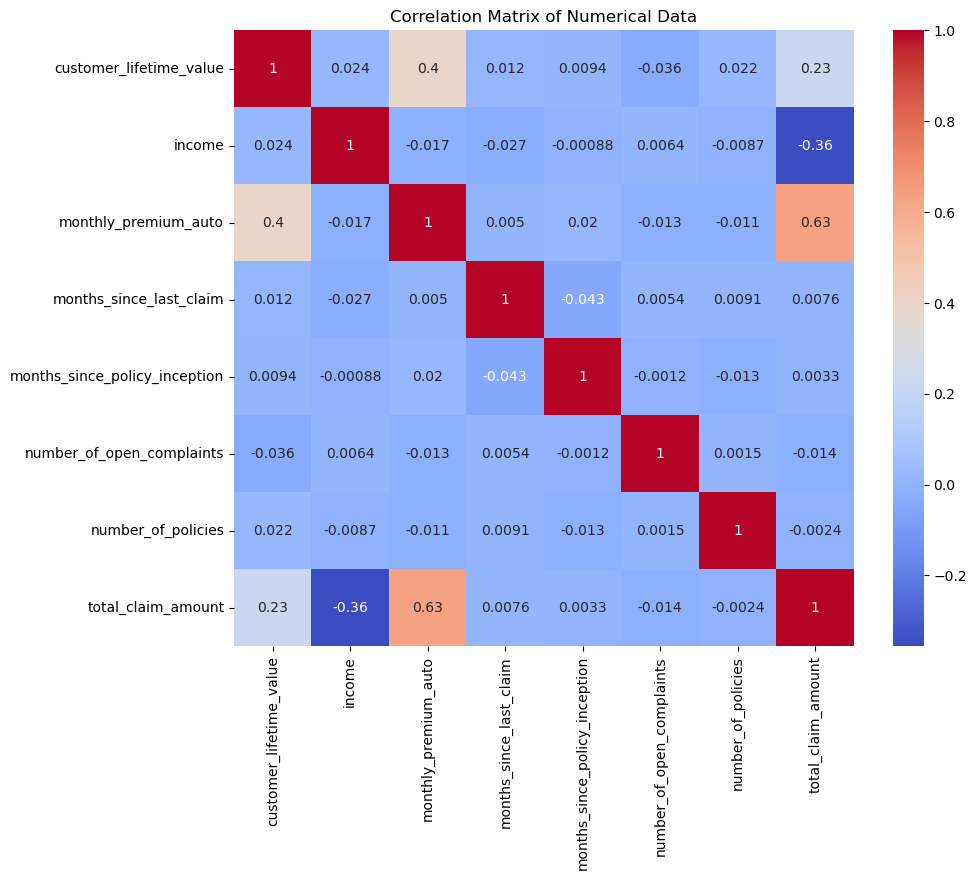

In [70]:
# Plot a correlation matrix, comment what you see.

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Data')
plt.show()

In [ ]:
'''
The correlation matrix plotted above shows the following key points:
Customer Lifetime Value has a moderate positive correlation with Monthly Premium Auto and Total Claim Amount, 
    suggesting that as the monthly premium and claim amounts increase, so does the customer lifetime value.
    
Income is negatively correlated with Monthly Premium Auto and Total Claim Amount, 
    indicating that customers with higher income tend to have lower monthly premiums and claim amounts.
    
Monthly Premium Auto has a strong positive correlation with Total Claim Amount, 
    which is expected as higher premiums are often associated with higher claims.
    
The other variables, such as Months Since Last Claim and Months Since Policy Inception, 
    show very little to no correlation with the rest of the variables, indicating that they do not have a 
        linear relationship with other numerical factors in the dataset.
'''

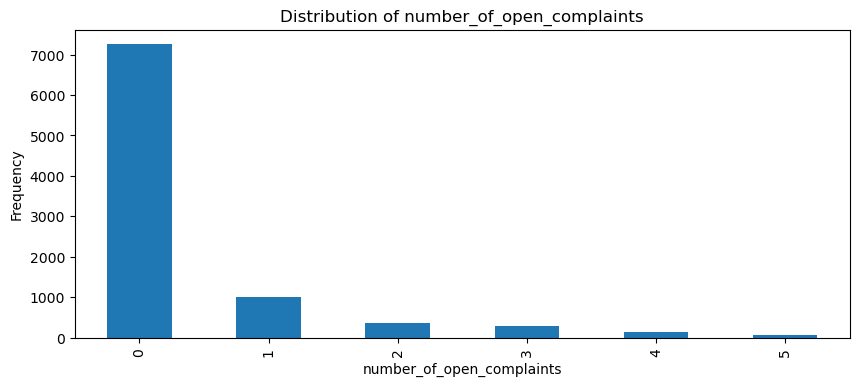

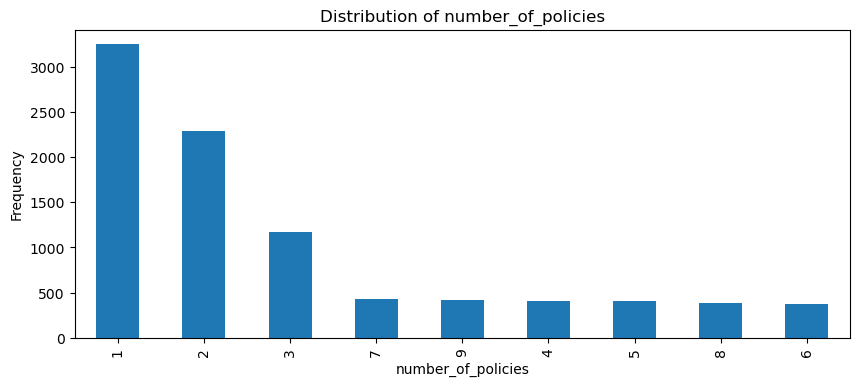

In [71]:
# 8. Create a function to plot every discrete variable

def plot_discrete(df):
    for column in df:
        plt.figure(figsize=(10, 4))
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Plotting the discrete variables
plot_discrete(discrete_df)

In [ ]:
'''Number of Open Complaints: Most customers have no open complaints. The number of customers decreases significantly as the number of open complaints increases.
Number of Policies: Most customers have only one policy. The number of customers decreases as the number of policies increases, with a slight increase at 3 policies.
'''

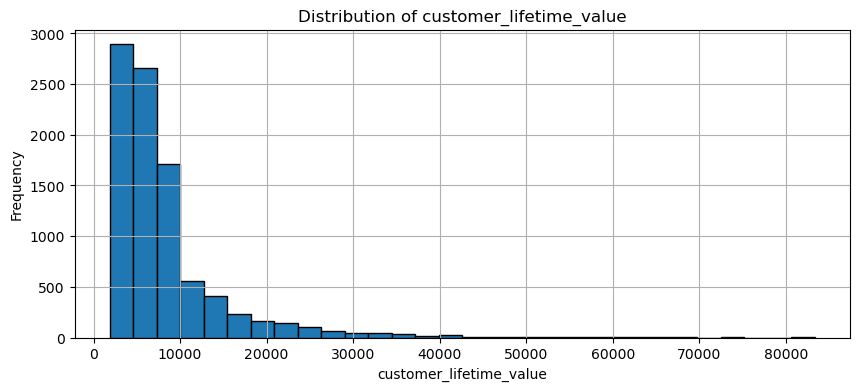

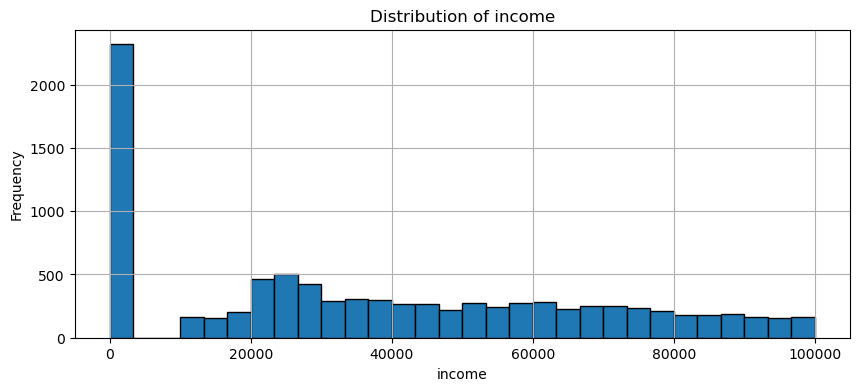

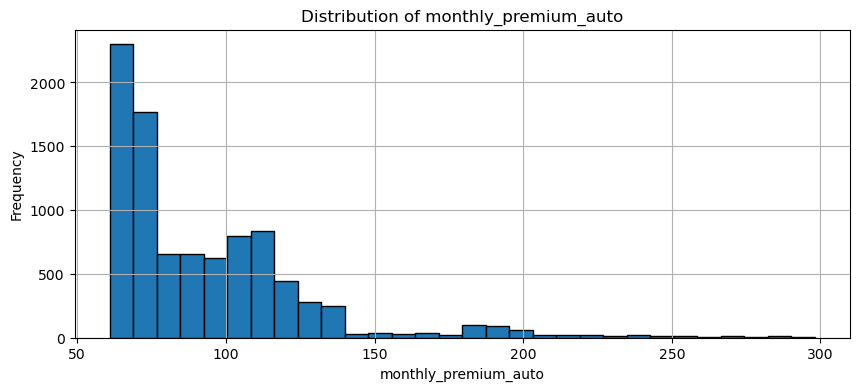

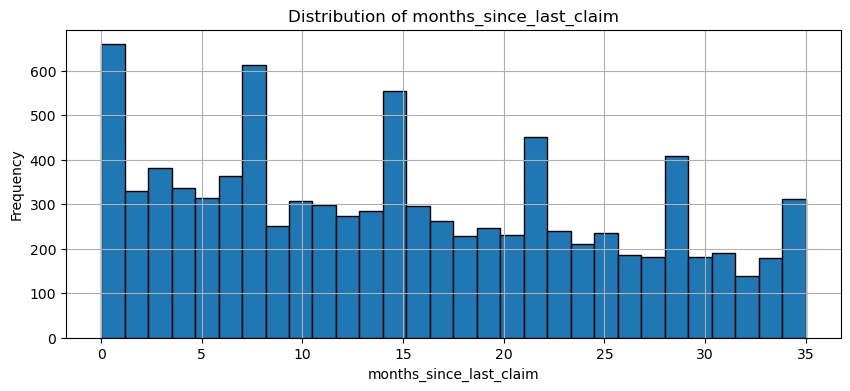

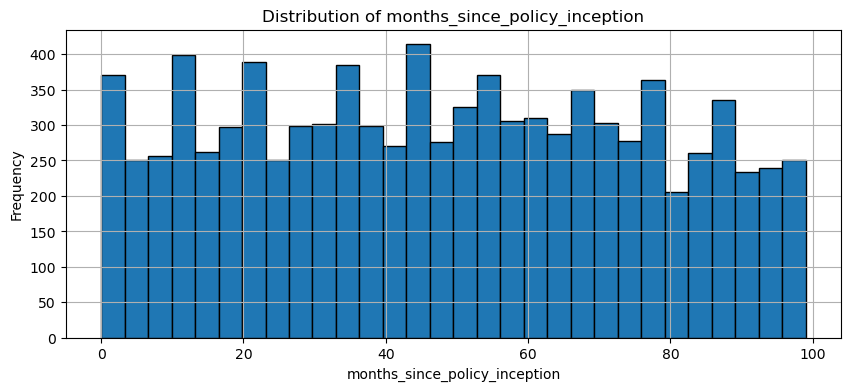

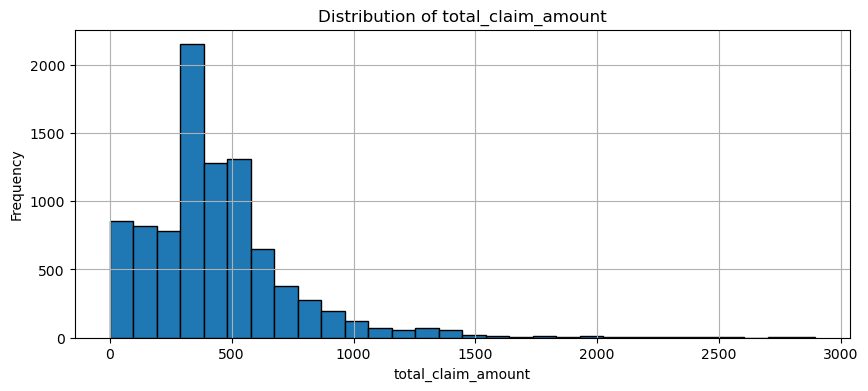

In [73]:
# Create a function to plot every continuous variable

def plot_continuous(df):
    for column in df:
        plt.figure(figsize=(10, 4))
        df[column].hist(bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Plotting the continuous variables
plot_continuous(continuous_df)

In [74]:
'''
Customer Lifetime Value: The distribution is right-skewed, indicating that most customers have a lower lifetime value, with a few customers having a high lifetime value.
Income: The distribution shows a significant number of customers with zero income. The rest of the distribution is fairly uniform.
Monthly Premium Auto: The distribution is right-skewed, indicating that most customers pay lower monthly premiums, with a few customers paying high premiums.
Months Since Last Claim: The distribution is fairly uniform, indicating that the months since the last claim are evenly spread out for customers.
Months Since Policy Inception: The distribution is fairly uniform, indicating that the policy inception dates are evenly spread out for customers.
Total Claim Amount: The distribution is right-skewed, indicating that most customers have lower claim amounts, with a few customers having high claim amounts.

'''

'\nCustomer Lifetime Value: The distribution is right-skewed, indicating that most customers have a lower lifetime value, with a few customers having a high lifetime value.\nIncome: The distribution shows a significant number of customers with zero income. The rest of the distribution is fairly uniform.\nMonthly Premium Auto: The distribution is right-skewed, indicating that most customers pay lower monthly premiums, with a few customers paying high premiums.\nMonths Since Last Claim: The distribution is fairly uniform, indicating that the months since the last claim are evenly spread out for customers.\nMonths Since Policy Inception: The distribution is fairly uniform, indicating that the policy inception dates are evenly spread out for customers.\nTotal Claim Amount: The distribution is right-skewed, indicating that most customers have lower claim amounts, with a few customers having high claim amounts.\n\n'

In [78]:
def drop_outliers_IQR(df):
    
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    outliers_dropped = not_outliers.dropna()

    return outliers_dropped

no_outlier = drop_outliers_IQR(continuous_df)
no_outlier

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69.0,32,5,384.811147
2,12887.431650,48767,108.0,18,38,566.472247
3,7645.861827,0,106.0,18,65,529.881344
4,2813.692575,43836,73.0,12,44,138.130879
5,8256.297800,62902,69.0,14,94,159.383042
...,...,...,...,...,...,...
9128,4100.398533,47761,104.0,16,58,541.282007
9130,3096.511217,21604,79.0,14,28,379.200000
9131,8163.890428,0,85.0,9,37,790.784983
9132,7524.442436,21941,96.0,34,3,691.200000


In [103]:
no_outlier.isna().sum() #no NaN values have been detected

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
total_claim_amount               0
dtype: int64

In [108]:
numerical_df.to_csv("/Users/giacomorossini/Desktop/IRONHACK/Laboratory/LAB11.1/lab-cleaning-numerical-data/numerical_df.csv")